In [1]:
import pandas as pd
import os
from collections import defaultdict
from pathlib import Path

## Loadable Files (I have shared with you some loadable files for you to test out)
## Silk RoadTopics - Sheet1
## C:/Users/Sid/Downloads/Silk RoadTopics - Sheet1.csv
## silkroadconvert.csv // FAIL
## 

## MAIN FILE: C:\Users\Sid\Desktop\Full CSV.csv
## copyable: C:/Users/Sid/Desktop/Full CSV.csv

## USING A SINGLE CSV
#papers = pd.read_csv('C:/Users/Sid/Desktop/Full CSV.csv')
#type(papers)


## USING A DATAFRAME
#Full text files
#my_dir_path = 'C:/Users/Sid//text_files_no_dupes'

#Individual subjects
#my_dir_path = 'C:/Users/Sid//Desktop/Cryptocurrency'
#my_dir_path = 'C:/Users/Sid//Desktop/Cybercrime'
#my_dir_path = 'C:/Users/Sid//Desktop/Darknet'
#my_dir_path = 'C:/Users/Sid//Desktop/Encryption & Tor'
#my_dir_path = 'C:/Users/Sid//Desktop/Hackers'
#my_dir_path = 'C:/Users/Sid//Desktop/Adult'
#my_dir_path = 'C:/Users/Sid//Desktop/Privacy'
#my_dir_path = 'C:/Users/Sid//Desktop/Black markets'

#Single video
my_dir_path = 'C:/Users/Sid//Desktop//Single video'


results = defaultdict(list)
for file in Path(my_dir_path).iterdir():
    with open(file, "r", encoding='latin-1') as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
df = pd.DataFrame(results)
print(df.shape)
print(df)

papers = df["text"]

papers = papers.to_frame()
type(papers)

(1, 2)
                                           file_name  \
0  Monitoring and Detection of Silent Malicious C...   

                                                text  
0   thank much thank saikhan speaker always pleas...  


pandas.core.frame.DataFrame

In [2]:
papers.head()

,text
0,thank much thank saikhan speaker always pleas...


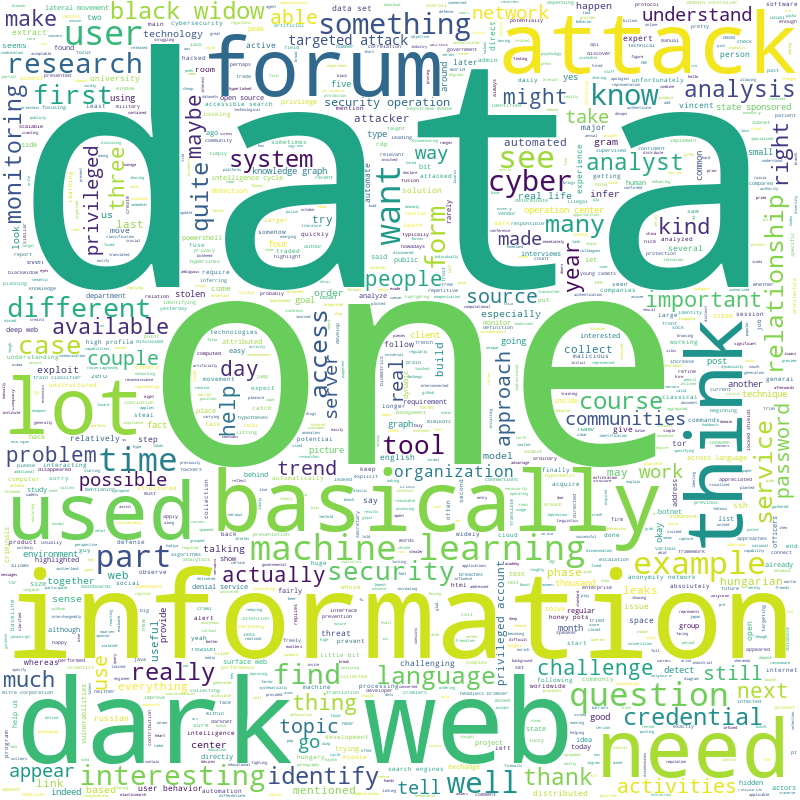

In [3]:
## run pip install WordCloud if you have not had this installed already! ##

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers["text"].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width = 800, height = 800)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [4]:
# These are the imports required to run our NLP libraries. The LDA model Gensim, the NLTK (a toolkit designed for natural language)
# and necessary details from these libraries, including a corpus. 
# A Corpus is a collection of documents, in this case, we are downloading the corpus of stopwords. 
# Stopwords are those words that do not provide any useful information to decide in which category a text should be classified.
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#### TODO: STOPWORDS ####
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'um', 'like', 'know', 'uh', 'think', 'thing', 
                   'gonna', 'want', 'txt', 'go', 'see', 'okay', 'going', 'one', 'get', 'dark', 'really', 'would', 'well', 'also', 
                   'lot', 'people', 'got', 'web', 'good', 'kind', 'let', 'oh', 'right', 'things', 
                   'kinds', 'yeah', 'us ', 'usually', 'way', 'even', 'much', 'actually', 'us', 'say', 'back', 'take', 'little', 
                   'would', 'well', 'no', 'basically', 'stuff', 'should', 'could', 'from', 'subject', 're', 'edu', 'use', 'um', 'like', 'know', 'uh', 'think', 'thing', 
                   'gonna', 'want', 'txt', 'go', 'see', 'okay', 'going', 'one', 'get', 'dark', 'really', 'would', 'well', 'also', 
                   'lot', 'people', 'got', 'web', 'good', 'kind', 'let', 'oh', 'right', 'things', 
                   'kinds', 'yeah', 'us ', 'usually', 'way', 'even', 'much', 'actually', 'us', 'say', 'back', 'take', 'little', 
                   'could', 'should', 'well', 'no', 'something', 'make', 'look', 'using', 'find', 'need', 'different', 'search', 'first', 'time', 'basically',
                   'used', 'maybe', 'many', 'might'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

C:\Users\Sid\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


['thank', 'thank', 'saikhan', 'speaker', 'always', 'pleasure', 'come', 'tallinn', 'participate', 'conference', 'organized', 'presentation', 'monitoring', 'cybersecurity', 'information', 'work', 'research', 'switzerland', 'otama', 'swiss', 'collaborators', 'unfortunately', 'except', 'maarten', 'stroma', 'room', 'certainly', 'happy', 'questions', 'later']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# The corpora module is Gensim's way of assigning a dictionary to their integer IDs for NLP tasks.
# In Gensim documentation: This module implements the concept of a Dictionary – a mapping between words and their integer ids.
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 10), (3, 3), (4, 1), (5, 1), (6, 15), (7, 4), (8, 1), (9, 7), (10, 3), (11, 3), (12, 6), (13, 5), (14, 10), (15, 1), (16, 4), (17, 1), (18, 1), (19, 1), (20, 4), (21, 1), (22, 1), (23, 3), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [6]:
# The LDA model is complete after running this cell. 
# Here, we build an LDA model using Gensim's command and supply the necessary variables: the corpus, the id mappings,
# and the number of topics we have selected for it to generate.

# Each topic has a keyword, and we will print the generated topic keywords below with another command. 

# Increasing or decreasing the number of topics can correspondingly change the coherence score. 
# Coherence is likely to increase until a certain number of topics is selected, and then drop off. This number is 
# supposed to be generated by the cell at the very end, which plots the coherence scores on a Y axis and the number of topics
# on the x. It runs the model through each number of topics and records the scores to do this - which means
# it will likely take a long time to run for large document sets (corpus size).  

from pprint import pprint
# number of topics
num_topics = 200
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)


#If you would like to see all the top topics and their salient terms, which is done by the visualization normally, uncomment this. 
top_topics = lda_model.top_topics(corpus)
pprint(top_topics)

# Print the Keyword in the X topics
#pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]

[([(0.014861264, 'data'),
   (0.008547215, 'information'),
   (0.006371702, 'example'),
   (0.0061656213, 'learning'),
   (0.0055992156, 'machine'),
   (0.0051393975, 'attacks'),
   (0.004952882, 'security'),
   (0.004907898, 'privileged'),
   (0.004860171, 'forums'),
   (0.0045921733, 'real'),
   (0.004392985, 'part'),
   (0.0041077384, 'help'),
   (0.004064771, 'course'),
   (0.004058553, 'question'),
   (0.0040101, 'interesting'),
   (0.0038840924, 'widow'),
   (0.0038374795, 'black'),
   (0.003820255, 'identify'),
   (0.0037249518, 'user'),
   (0.0037138867, 'research')],
  1.0000889005818406e-12),
 ([(0.0072970507, 'data'),
   (0.005028291, 'machine'),
   (0.004122057, 'learning'),
   (0.0040810383, 'information'),
   (0.0035872022, 'attacks'),
   (0.0035587281, 'part'),
   (0.0034148705, 'user'),
   (0.0032677439, 'interesting'),
   (0.0032597624, 'security'),
   (0.0031397915, 'example'),
   (0.0027922215, 'research'),
   (0.0027182424, 'access'),
   (0.0026775089, 'forums'),
  

In [7]:
# This visualization I found online and is useful in navigating the complexity of the different topics and the relevant salient terms.
# You can adjust the relevance metric, 

#Visualization Cell
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

C:\Users\Sid\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\Sid\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [ ]:
LDAvis_prepared

In [ ]:
#Coherence Score
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
#Perplexity Score
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

In [ ]:
## This is failing for unknown reasons, it's supposed to automate us improving the model but I cannot get it to work. Unfinished as of 8/12/2021
import matplotlib as plt

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=6)
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))